In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.sample(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
2865,flat,m3m heights,sector 65,2.65,18492.0,1433.0,Super Built up area 1433(133.13 sq.m.),2,2,3,study room,4.0,North-East,Within 6 months,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']","['1 Stove', '3 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [6]:
# area column is not reliable
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3480,2.35,1450.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.)
2923,2.25,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)
877,4.25,3763.0,Super Built up area 3763(349.59 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.)
473,0.86,1342.0,Super Built up area 1342(124.68 sq.m.)
2078,0.90,1435.0,Built Up area: 1435 (133.32 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2374,2.30,flat,1479.0,Built Up area: 1479 (137.4 sq.m.),NaN,1479.0,NaN
3074,0.67,flat,1150.0,Super Built up area 1375(127.74 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 1150 sq.ft. (106.84 sq.m.),1375.0,1250.0,1150.0
2501,0.95,flat,1897.0,Super Built up area 1897(176.24 sq.m.),1897.0,NaN,NaN
2719,1.77,flat,2408.0,Super Built up area 2408(223.71 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),2408.0,1450.0,1300.0
3072,0.50,flat,650.0,Super Built up area 546(50.73 sq.m.),546.0,NaN,NaN


In [12]:
df.duplicated().sum()

122

In [13]:
# not null of these three values (super,built,carpet)
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
# plot area
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,NaN,NaN
4,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
27,3.35,house,1242.0,Plot area 138(115.39 sq.m.),NaN,NaN,NaN
47,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,NaN,NaN
53,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
# all values are missing ( super,build,carpet)
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,NaN,NaN
4,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
27,3.35,house,1242.0,Plot area 138(115.39 sq.m.),NaN,NaN,NaN
47,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,NaN,NaN
53,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [22]:
# compare area vs built up area
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2944,0.66,house,612.0,Plot area 612(56.86 sq.m.),NaN,612.0,NaN
610,7.60,house,1961.0,Plot area 215(179.77 sq.m.),NaN,215.0,NaN
1144,1.30,house,1152.0,Plot area 1152(107.02 sq.m.),NaN,1152.0,NaN
679,5.70,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.0,NaN
3213,26.00,house,4545.0,Plot area 505(422.24 sq.m.),NaN,505.0,NaN


In [23]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [24]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [25]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,3500.0,NaN
4,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.0,NaN
27,3.35,house,1242.0,Plot area 138(115.39 sq.m.),NaN,1242.0,NaN
47,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,1440.0,NaN
53,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.0,NaN


In [26]:
# update the original dataframe
df.update(all_nan_df)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),2,2,0,not available,10.0,North,undefined,"['Dwaraka Expy, Tikampur Village', 'Sector 108, Gurugram', 'Kings International School', 'EuroKids Preschool Daulatabad', 'Gyaananda School', ""Colonel's Central Academy"", 'Imperial Heritage School', 'Chirag Hospital', 'Swastik Maternity Hospital', 'L.K Energy Company HP', 'BP Shree Shyam Filling Station', 'INOX Gurgaon Dreamz']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,750.0,605.0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4,4,3+,not available,18.0,NaN,undefined,"['Sector 53-54 metro station', 'Sector 42-43 metro station', 'Sector 54 chowk metro station', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'Rbs ATM', 'Hdfc ATM', 'Icici bank ATM', 'Paras Hospital Gurgaon', 'The Dental Lounge', 'Marwah Clinic', 'Arihant Hospital', 'Gupta', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Guardian Pharmacy', 'Chikitsa', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', '222', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Naivedyam Restaurant', 'Burger Singh', 'Bikanerwala', 'Wat-a-Burger', 'Iilm University', 'IILM', 'Suncity School', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2801.0,NaN
2,house,independent,sector 11,1.35,3857.0,3500.0,Plot area 3500(325.16 sq.m.),10,6,3+,not available,3.0,NaN,10+ Year Old,NaN,NaN,NaN,NaN,3500.0,NaN
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1124 sq.ft. (104.42 sq.m.),2,2,3+,others,18.0,South,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1406.0,1300.0,1124.0
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"pooja room,study room,servant room",2.0,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Mar

## 2.additionalRoom

In [29]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [30]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [31]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1593,servant room,0,1,0,0,0
1081,not available,0,0,0,0,0
949,servant room,0,1,0,0,0
440,servant room,0,1,0,0,0
1550,not available,0,0,0,0,0


In [32]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),2,2,0,not available,10.0,North,undefined,"['Dwaraka Expy, Tikampur Village', 'Sector 108, Gurugram', 'Kings International School', 'EuroKids Preschool Daulatabad', 'Gyaananda School', ""Colonel's Central Academy"", 'Imperial Heritage School', 'Chirag Hospital', 'Swastik Maternity Hospital', 'L.K Energy Company HP', 'BP Shree Shyam Filling Station', 'INOX Gurgaon Dreamz']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,750.0,605.0,0,0,0,0,0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4,4,3+,not available,18.0,NaN,undefined,"['Sector 53-54 metro station', 'Sector 42-43 metro station', 'Sector 54 chowk metro station', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'Rbs ATM', 'Hdfc ATM', 'Icici bank ATM', 'Paras Hospital Gurgaon', 'The Dental Lounge', 'Marwah Clinic', 'Arihant Hospital', 'Gupta', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Guardian Pharmacy', 'Chikitsa', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', '222', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Naivedyam Restaurant', 'Burger Singh', 'Bikanerwala', 'Wat-a-Burger', 'Iilm University', 'IILM', 'Suncity School', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2801.0,NaN,0,0,0,0,0
2,house,independent,sector 11,1.35,3857.0,3500.0,Plot area 3500(325.16 sq.m.),10,6,3+,not available,3.0,NaN,10+ Year Old,NaN,NaN,NaN,NaN,3500.0,NaN,0,0,0,0,0
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1124 sq.ft. (104.42 sq.m.),2,2,3+,others,18.0,South,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1406.0,1300.0,1124.0,0,0,0,0,1
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"pooja room,study room,servant room",2.0,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhart

## 3.agePossession

In [33]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
By 2025                  4
Aug 2024                 4
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Feb 2024                 3
Jul 2025                 2
Mar 2025                 2
Sep 2025                 2
Jan 2026                 2
By 2027                  2
Aug 2025                 2
Oct 2025                 2
Jun 2027                 2
Dec 2026      

In [34]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [35]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [36]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [37]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),2,2,0,not available,10.0,North,Undefined,"['Dwaraka Expy, Tikampur Village', 'Sector 108, Gurugram', 'Kings International School', 'EuroKids Preschool Daulatabad', 'Gyaananda School', ""Colonel's Central Academy"", 'Imperial Heritage School', 'Chirag Hospital', 'Swastik Maternity Hospital', 'L.K Energy Company HP', 'BP Shree Shyam Filling Station', 'INOX Gurgaon Dreamz']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,750.0,605.0,0,0,0,0,0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4,4,3+,not available,18.0,NaN,Undefined,"['Sector 53-54 metro station', 'Sector 42-43 metro station', 'Sector 54 chowk metro station', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'Rbs ATM', 'Hdfc ATM', 'Icici bank ATM', 'Paras Hospital Gurgaon', 'The Dental Lounge', 'Marwah Clinic', 'Arihant Hospital', 'Gupta', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Guardian Pharmacy', 'Chikitsa', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', '222', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Naivedyam Restaurant', 'Burger Singh', 'Bikanerwala', 'Wat-a-Burger', 'Iilm University', 'IILM', 'Suncity School', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2801.0,NaN,0,0,0,0,0
2,house,independent,sector 11,1.35,3857.0,3500.0,Plot area 3500(325.16 sq.m.),10,6,3+,not available,3.0,NaN,Old Property,NaN,NaN,NaN,NaN,3500.0,NaN,0,0,0,0,0
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1124 sq.ft. (104.42 sq.m.),2,2,3+,others,18.0,South,Relatively New,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1406.0,1300.0,1124.0,0,0,0,0,1
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"pooja room,study room,servant room",2.0,North-East,Moderately Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia'

## 4.furnishDetails

In [38]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2642,NaN,NaN
419,"['1 Stove', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2989,"['6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '5 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2580,"['7 Fan', '1 Exhaust Fan', '4 Geyser', '15 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', '5 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3794,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '55 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Security Personnel', 'Low Density Society', 'Rain Water Harvesting']"


In [39]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [40]:
furnishings_df.shape

(3803, 19)

In [41]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15500\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [45]:
furnishings_df.sample(5)

,Dining Table,Bed,Water Purifier,Exhaust Fan,TV,Microwave,Wardrobe,Fan,Chimney,Washing Machine,Geyser,Curtains,Fridge,Sofa,Light,Modular Kitchen,AC,Stove
3778,0,0,0,1,0,0,3,0,0,0,3,0,0,0,0,1,0,0
3729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3375,0,0,0,1,0,0,11,1,1,0,1,1,0,0,1,1,3,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1075,0,0,0,1,0,0,3,5,1,0,3,0,0,0,11,1,0,0


In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [49]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

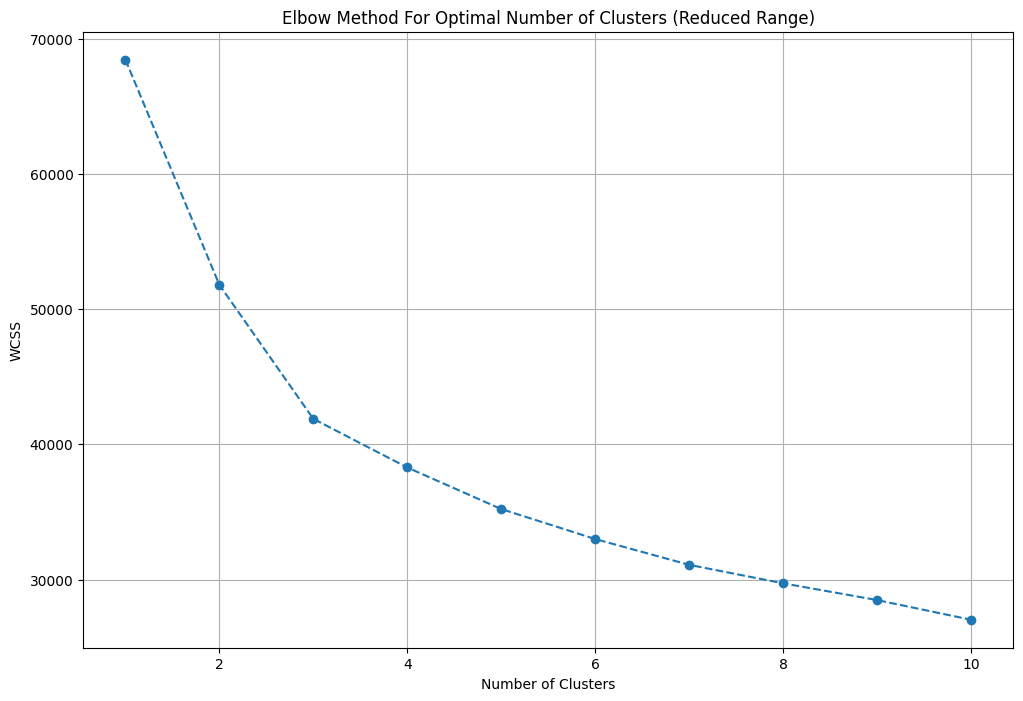

In [50]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [51]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
df = df.iloc[:,:-18]

In [53]:
df['furnishing_type'] = cluster_assignments

In [55]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1600,"['9 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2230,NaN,1
160,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2337,"['1 Water Purifier', '1 Fridge', '4 Fan', '1 Exhaust Fan', '1 Dining Table', '1 Stove', '4 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '1 Bed', '2 Wardrobe', '1 Sofa', 'No AC', 'No Geyser', 'No Microwave', 'No TV', 'No Washing Machine']",2
1158,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '4 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [56]:
df[['society','features']].sample(5)

,society,features
3754,breeze global heights,NaN
1296,paras dews,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
158,unitech uniworld resorts,"['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"
1415,indiabulls enigma,NaN
1365,smart world orchard,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"


In [57]:
df['features'].isnull().sum()

635

In [58]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [59]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [60]:
temp_df = df[df['features'].isnull()]

In [61]:
temp_df.shape

(635, 26)

In [62]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [63]:
df.loc[temp_df.index,'features'] = x.values

In [64]:
# we fill some of the missing values
df['features'].isnull().sum()

481

In [65]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [66]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [68]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1829,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
836,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1809,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3780,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [69]:
features_binary_df.shape

(3803, 130)

In [70]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\envs\caps\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

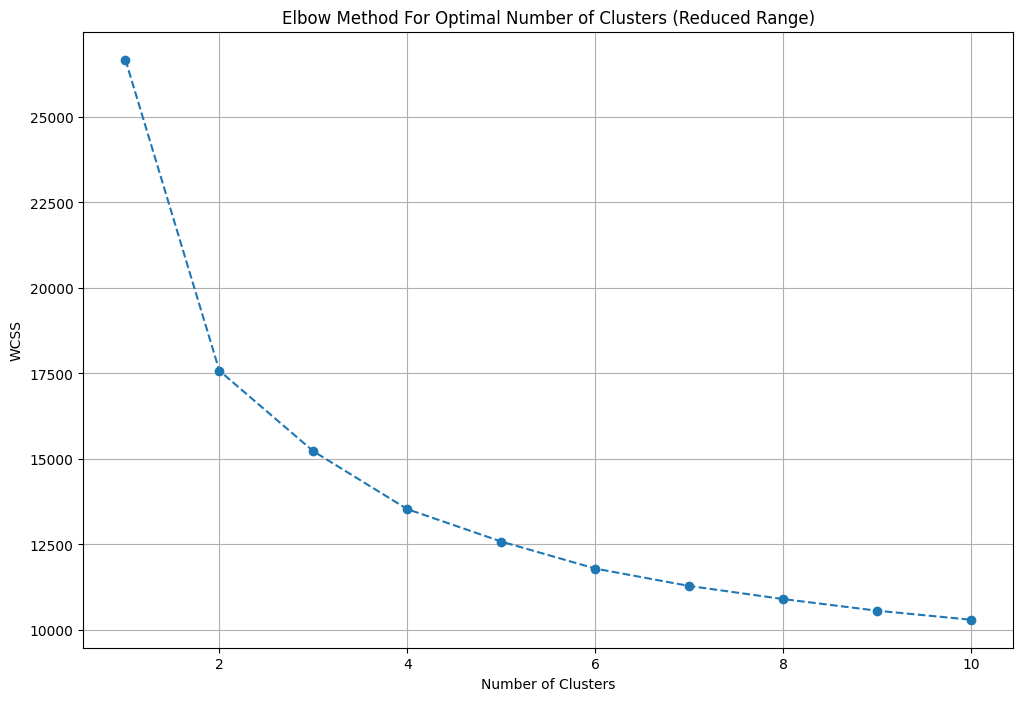

In [71]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [72]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [73]:
df['luxury_score'] = luxury_score

In [75]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),2,2,0,not available,10.0,North,Undefined,"['Dwaraka Expy, Tikampur Village', 'Sector 108, Gurugram', 'Kings International School', 'EuroKids Preschool Daulatabad', 'Gyaananda School', ""Colonel's Central Academy"", 'Imperial Heritage School', 'Chirag Hospital', 'Swastik Maternity Hospital', 'L.K Energy Company HP', 'BP Shree Shyam Filling Station', 'INOX Gurgaon Dreamz']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,750.0,605.0,0,0,0,0,0,1,[],0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4,4,3+,not available,18.0,NaN,Undefined,"['Sector 53-54 metro station', 'Sector 42-43 metro station', 'Sector 54 chowk metro station', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'Rbs ATM', 'Hdfc ATM', 'Icici bank ATM', 'Paras Hospital Gurgaon', 'The Dental Lounge', 'Marwah Clinic', 'Arihant Hospital', 'Gupta', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Guardian Pharmacy', 'Chikitsa', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', '222', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Naivedyam Restaurant', 'Burger Singh', 'Bikanerwala', 'Wat-a-Burger', 'Iilm University', 'IILM', 'Suncity School', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2801.0,NaN,0,0,0,0,0,1,[],0
2,house,independent,sector 11,1.35,3857.0,3500.0,Plot area 3500(325.16 sq.m.),10,6,3+,not available,3.0,NaN,Old Property,NaN,NaN,NaN,NaN,3500.0,NaN,0,0,0,0,0,1,[],0
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1124 sq.ft. (104.42 sq.m.),2,2,3+,others,18.0,South,Relatively New,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1406.0,1300.0,1124.0,0,0,0,0,1,1,"[Centrally Air Conditioned, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Bank Attached Property, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness 

In [76]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [77]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3269,flat,m3m heights,sector 65,2.01,13500.0,1489.0,Super Built up area 1516(140.84 sq.m.)Carpet area: 1433 sq.ft. (133.13 sq.m.),2,2,3,8.0,North-East,New Property,1516.0,NaN,1433.000000,1,0,0,0,0,1,44
388,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up area: 978.23 sq.ft. (90.88 sq.m.)Carpet area: 734.43 sq.ft. (68.23 sq.m.),2,3,3,4.0,East,Relatively New,1283.0,978.23,734.430000,1,0,0,0,0,1,135
2465,flat,dlf the ultima,sector 81,2.26,10761.0,2100.0,Super Built up area 2100(195.1 sq.m.),3,4,3+,17.0,West,New Property,2100.0,NaN,NaN,0,1,0,0,0,2,174
1056,flat,signature global grand iva,sector 103,0.30,8290.0,362.0,Carpet area: 361.88 (33.62 sq.m.),1,2,2,5.0,NaN,New Property,NaN,NaN,361.882318,0,0,0,0,0,1,37
2256,flat,ss the leaf,sector 85,1.14,6951.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,4.0,South,Relatively New,1640.0,NaN,NaN,0,0,0,0,0,1,109


In [78]:
df.shape

(3803, 23)

In [79]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)